# DATA VISUALIZATION AND PREPARATION FOR REGRESSION

This Python notebook contains a skeleton of the various tasks to execute, in order to help you complete the project.

## Libraries

In [96]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

sns.set_theme(style="whitegrid")

## Data loading

### Load the dataset

In [97]:
# Insert local path to dataset file as a string
import os
path=os.getcwd()+"\\A2_student-mat.csv"
# Load the file
df = pd.read_csv(filepath_or_buffer= path, sep = ';')

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,NaN,U,GT3,A,4,4,at_home,other,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
393,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
394,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
395,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Visualize the first rows of the dataset

In [98]:
first_row=df[:1]   # HINT: Pandas.DataFrame class has a method to do this
print(first_row)

  school sex   age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  ...  \
0     GP   F  18.0       U     GT3       A     4     4  at_home  teacher  ...   

  famrel freetime  goout  Dalc  Walc health absences G1 G2 G3  
0      4        3      4     1     1      3        6  5  6  6  

[1 rows x 33 columns]


### Inspect the data types of the columns

In [99]:
df.info()       # HINT: Pandas.DataFrame class has a method to do this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      397 non-null    object 
 1   sex         397 non-null    object 
 2   age         396 non-null    float64
 3   address     397 non-null    object 
 4   famsize     397 non-null    object 
 5   Pstatus     397 non-null    object 
 6   Medu        397 non-null    int64  
 7   Fedu        397 non-null    int64  
 8   Mjob        396 non-null    object 
 9   Fjob        396 non-null    object 
 10  reason      397 non-null    object 
 11  guardian    397 non-null    object 
 12  traveltime  397 non-null    int64  
 13  studytime   397 non-null    int64  
 14  failures    397 non-null    int64  
 15  schoolsup   397 non-null    object 
 16  famsup      397 non-null    object 
 17  paid        397 non-null    object 
 18  activities  397 non-null    object 
 19  nursery     397 non-null    o

## Data cleaning

### Check for the presence of null values and remove the rows containing them (if present)

In [100]:

#HINT: use 2 methods chained: the first to check each element being null (converting df entries in boolean values),
#      the second to check if there is any True elements in the dataframe
df = df[df.notnull().all(axis=1)==True]
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
5,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
393,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
394,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
395,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [101]:

df = df.reset_index() 
df     #HINT: Pandas.DataFrame class has a method to do this. Remove each row that contains at least a null element

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17.0,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15.0,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15.0,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16.0,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,392,MS,M,20.0,U,LE3,A,2,2,services,...,5,5,4,4,5,4,11,9,9,9
391,393,MS,M,17.0,U,LE3,T,3,1,services,...,2,4,5,3,4,2,3,14,16,16
392,394,MS,M,21.0,R,GT3,T,1,1,other,...,5,5,3,3,3,3,3,10,8,7
393,395,MS,M,18.0,R,LE3,T,3,2,services,...,4,4,1,3,4,5,0,11,12,10


## Descriptive statistics and visualizations

### Display the number of students

In [102]:
tot_students = df.shape[0]     #HINT: check the shape of the dataframe
print(f"Total number of students: {tot_students}")

Total number of students: 395


### Display the number of features

In [103]:
tot_features = df.shape[1]    #HINT: check the shape of the dataframe
# alternative df.columns.size
print(f"Total number of features: {tot_features}")

Total number of features: 34


### Describe "G3" feature with its main statistics (mean, standard deviation, quartiles, ecc.)

In [119]:
df['G3'].describe()    #HINT: Pandas.DataFrame class has a method to do this.

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

### Plot "G3" empirical distribution

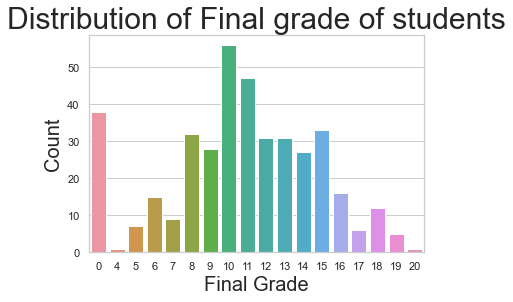

In [117]:
b = sns.countplot(x='G3',data=df)     #HINT: plot the count of the occurrences of each value for 'G3'
b.axes.set_title('Distribution of Final grade of students', fontsize = 30)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

### Plot "Age" empirical distribution

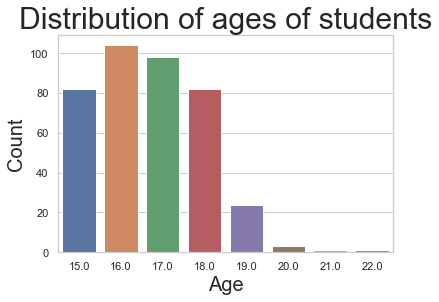

In [116]:
b = sns.countplot(x='age',data=df)         #HINT: plot the count of the occurrences of each value for 'age'
b.axes.set_title('Distribution of ages of students', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

### Plot "Age" distribution grouped by "Gender"

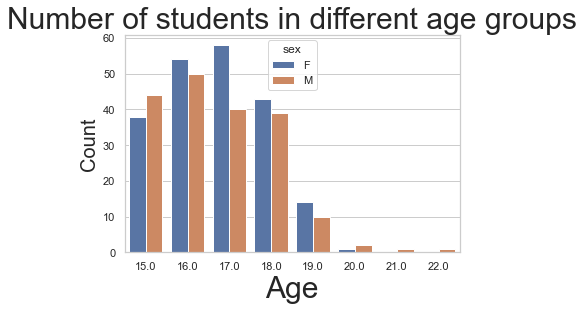

In [120]:
b = sns.countplot(x='age',hue='sex',data=df)         #HINT: similar as above, but adding the parameter 'hue'
b.axes.set_title('Number of students in different age groups',fontsize=30)
b.set_xlabel("Age",fontsize=30)
b.set_ylabel("Count",fontsize=20)
plt.show()

### Plot a boxplot of "Age" vs "G3"

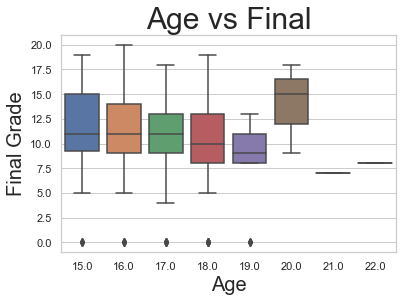

In [129]:
b = sns.boxplot(x='age',y='G3',data=df)       #HINT: check Seaborn docs
b.axes.set_title('Age vs Final', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

### Plot a boxplot of "Gender" vs "G3"

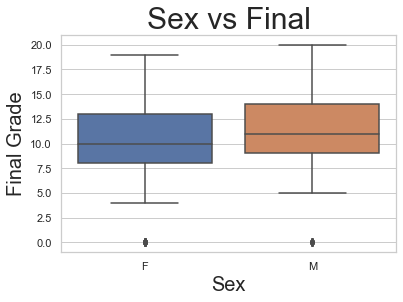

In [131]:
b = sns.boxplot(x='sex',y='G3',data=df) 
b.axes.set_title('Sex vs Final', fontsize = 30)
b.set_xlabel('Sex', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

### Plot a boxplot of "Age" vs "G3" grouped by "Gender"

C:\Users\Cosim\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Cosim\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Cosim\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Cosim\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


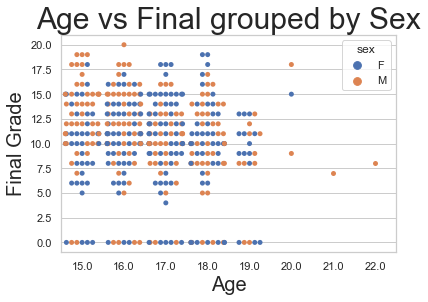

In [132]:
b = sns.swarmplot(x='age',y='G3',hue='sex',data=df)       #HINT: try 'swarmplot' function
b.axes.set_title('Age vs Final grouped by Sex', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

### Count how many students live in Rural and Urban areas ("Address" feature)

In [152]:
df.shape
urban = df[df['address']=='U'].shape[0]   #HINT: chech shapes again, but apply first the correct filter on data
rural = df[df['address']=='R'].shape[0]

print(f"Tot students from urban areas: {urban}\nTot students from rural areas: {rural}")

Tot students from urban areas: 307
Tot students from rural areas: 88


### Plot the estimated CONTINUOUS distributions of "G3" for students living in Urban and Rural areas on the same plot

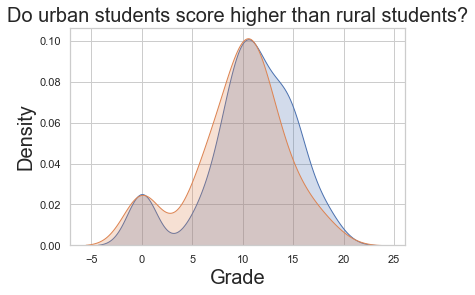

In [159]:
sns.kdeplot(shade=True,data=df[df['address']=='U'], x='G3')        #HINT: try 'kdeplot' function. Use 'shade' parameter
sns.kdeplot(shade=True,data=df[df['address']=='R'], x='G3')         #      in order to see both distributions. 
plt.title('Do urban students score higher than rural students?', fontsize = 20)
plt.xlabel('Grade', fontsize = 20)
plt.ylabel('Density', fontsize = 20)
plt.show()

### Compute and display all correlations between features (optionally, find a suitable visualization)

In [164]:
corr=df.corr().abs()       #HINT: Pandas.DataFrame class has a method to do this.
corr

,index,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
index,1.000000,0.757770,0.161060,0.123277,0.134855,0.048541,0.026605,0.016314,0.003863,0.069105,0.086343,0.095685,0.088926,0.066056,0.046756,0.053652,0.100259
age,0.757770,1.000000,0.163658,0.163438,0.070641,0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,0.062187,0.175230,0.064081,0.143474,0.161579
Medu,0.161060,0.163658,1.000000,0.623455,0.171639,0.064944,0.236680,0.003914,0.030891,0.064094,0.019834,0.047123,0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,0.123277,0.163438,0.623455,1.000000,0.158194,0.009175,0.250408,0.001370,0.012846,0.043105,0.002386,0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.134855,0.070641,0.171639,0.158194,1.000000,0.100909,0.092239,0.016808,0.017025,0.028540,0.138325,0.134116,0.007501,0.012944,0.093040,0.153198,0.117142
studytime,0.048541,0.004140,0.064944,0.009175,0.100909,1.000000,0.173563,0.039731,0.143198,0.063904,0.196019,0.253785,0.075616,0.062700,0.160612,0.135880,0.097820
failures,0.026605,0.243665,0.236680,0.250408,0.092239,0.173563,1.000000,0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,0.354718,0.355896,0.360415
famrel,0.016314,0.053940,0.003914,0.001370,0.016808,0.039731,0.044337,1.000000,0.150701,0.064568,0.077594,0.113397,0.094056,0.044354,0.022168,0.018281,0.051363
freetime,0.003863,0.016434,0.030891,0.012846,0.017025,0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,0.058078,0.012613,0.013777,0.011307
goout,0.069105,0.126964,0.064094,0.043105,0.028540,0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,0.009577,0.044302,0.149104,0.162250,0.132791


## Manipulations and Feature Engineering

### Drop "G1" and "G2" features (perfectly correlated with "G3")

In [169]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] ==1)]
print(to_drop)
df.drop(df[to_drop],axis=1)        #HINT: Pandas.DataFrame class has a method to do this. 
                   #      Be sure to give the correct value for the 'axis' parameter.

[]


C:\Users\Cosim\AppData\Local\Temp\ipykernel_23736\2941070626.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17.0,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15.0,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15.0,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16.0,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,392,MS,M,20.0,U,LE3,A,2,2,services,...,5,5,4,4,5,4,11,9,9,9
391,393,MS,M,17.0,U,LE3,T,3,1,services,...,2,4,5,3,4,2,3,14,16,16
392,394,MS,M,21.0,R,GT3,T,1,1,other,...,5,5,3,3,3,3,3,10,8,7
393,395,MS,M,18.0,R,LE3,T,3,2,services,...,4,4,1,3,4,5,0,11,12,10


### Create feature "Social disadvantage" = "True" IF "Address" == "R" AND "famsize" == "GT3" AND "Pstatus" == "A" AND "internet" == "no" ELSE "False"

In [180]:
df['social_dis'] =  (df['address']=="R") & (df['famsize']=="GT3") & (df['Pstatus']=="A") & (df['internet']=="no")
df['social_dis']

#HINT: write down each condition on the dataframe, enclose them in parentheses () and chain the with the '&' operator.
#      Then, convert them in 'yes' and 'no' values, for coherence with the rest of the columns.

0      False
1      False
2      False
3      False
4      False
       ...  
390    False
391    False
392    False
393    False
394    False
Name: social_dis, Length: 395, dtype: bool

### Convert all categorical variables in one hot encoding

In [185]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(handle_unknown='ignore')
enc_df= pd.DataFrame(encoder.fit_transform(df).toarray())
final_df = df.join(enc_df)
final_df
#df = pd.___(df)     #HINT: Pandas has a function to do this, check docs.

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,576,577,578,579,580,581,582,583,584,585
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,GP,F,17.0,U,GT3,T,1,1,at_home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,GP,F,15.0,U,LE3,T,1,1,at_home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,GP,F,15.0,U,GT3,T,4,2,health,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,GP,F,16.0,U,GT3,T,3,3,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,392,MS,M,20.0,U,LE3,A,2,2,services,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
391,393,MS,M,17.0,U,LE3,T,3,1,services,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
392,394,MS,M,21.0,R,GT3,T,1,1,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
393,395,MS,M,18.0,R,LE3,T,3,2,services,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Find correlations again and keep only the 8 features with highest correlation with "G3"

In [194]:
most_correlated = df.corr()['G3'].abs().sort_values(ascending=False)                                                  #HINT: compute all correlations, select correlations with 'G3',
most_correlated = most_correlated[:9]                                       #      put them in absolute values and sort them. Then, select
most_correlated                                                             #      the first 8 + 1 (you want to keep 'G3' too) elements.

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
Name: G3, dtype: float64

In [195]:
# Keep only the columns found above
df = df.loc[:, most_correlated.index]
df.head()

,G3,G2,G1,failures,Medu,age,Fedu,goout,traveltime
0,6,6,5,0,4,18.0,4,4,2
1,6,5,5,0,1,17.0,1,3,1
2,10,8,7,3,1,15.0,1,2,1
3,15,14,15,0,4,15.0,2,2,1
4,10,10,6,0,3,16.0,3,2,1


### In a 4x2 plot grid (4 rows, 2 columns) plot each retained feature against the target variable “G3” (using suitable plots)

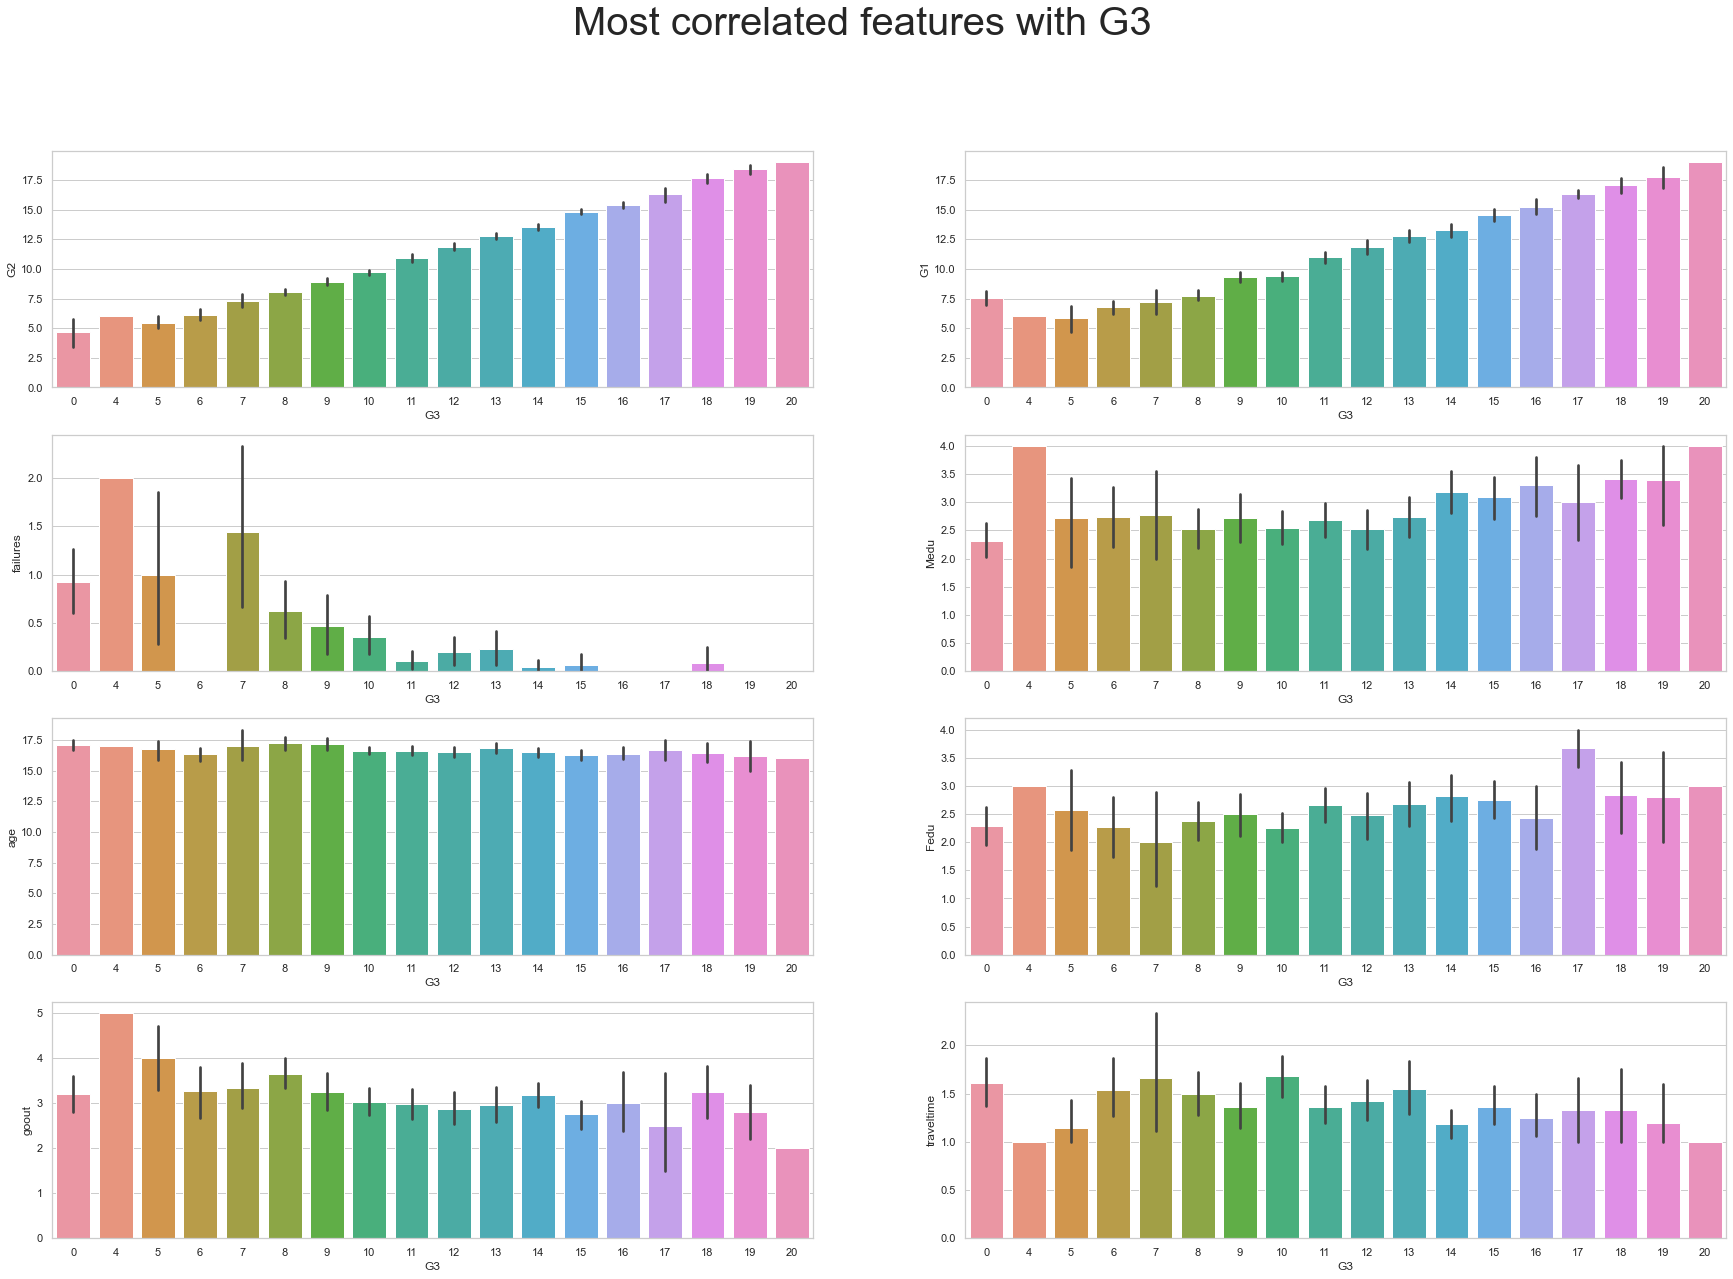

In [203]:
figure, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (30,20))

features = df.drop('G3', axis = 1).columns.to_list()
figure.suptitle('Most correlated features with G3', fontsize=40)
sns.set_color_codes("pastel")

for feature, ax in zip(features, axes.flatten()):
    b = sns.barplot(x='G3',y=feature,data=df,ax=ax)      #HINT: a barplot is suitable for all variables

plt.show()

## Regression

### Split the dataset in two randomly sampled subsets: training set (80% of data) and test set (20% of data)

In [204]:
X, y = df.drop('G3', axis = 1), df['G3']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

#HINT: use scikit-learn ad-hoc method

### Fit a linear regression model of the retained variables vs. “G3” using the training set

In [213]:
lr =LinearRegression(fit_intercept=True)
lr.fit(X, y)
                                            #HINT: create an instance of the LinearRegression class and fit it on the
                                                    #      training set.
                                                    #To retrieve the intercept:
print(lr.intercept_)
#For retrieving the slope:
print(lr.coef_)

0.07597329928229435
[ 0.96968909  0.15707173 -0.20356456  0.12537332 -0.13027551 -0.1304594
  0.08600435  0.13575268]


### Test the obtained model predicting the target variable “G3” for samples of the test set

In [220]:
y_pred = lr.predict(X_test)
y_pred
#HINT: LinearRegression class has a method to do this.

newdf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
newdf.sort_index()

,Actual,Predicted
1,6,3.883773
5,15,15.310854
6,11,11.982293
7,6,4.247344
10,9,7.823492
...,...,...
345,14,12.887872
375,10,7.455034
383,0,3.626478
389,0,3.670749


### Evaluate results

In [221]:
r_squared = lr.score(X,y)      #HINT: LinearRegression.score method gives the R^2 coefficient. Check the docs for usage

print(f"Fraction of explained variance (or R^2 coefficient) is {r_squared}")

#END

Fraction of explained variance (or R^2 coefficient) is 0.8259664021259325
